In [1]:
from populacao import Populacao
from rede import Rede
import osmnx as ox
from tqdm import tqdm

## Configuração das populações

In [2]:
adulto_config = {  
    "label": "adulto",
    "params": {  
        "tx_mortalidade": 0.01,
        "tx_mobilidade": 0.5,
        "tx_infeccao": 0.5,
        "tx_nascimento": 0.01,
        "tx_recuperacao": 0.2},
    "S": 100,
    "I": 80,
    "R": 0,
}

idoso_config = {  
    "label": "idoso",
    "params": {  
        "tx_mortalidade": 0.1,
        "tx_mobilidade": 0.1,
        "tx_infeccao": 0.8,
        "tx_nascimento": 0,
        "tx_recuperacao": 0.01},
    "S": 100,
    "I": 80,
    "R": 0,
}

crianca_config = {  
    "label": "crianca",
    "params": {  
        "tx_mortalidade": 0.01,
        "tx_mobilidade": 0.3,
        "tx_infeccao": 0.8,
        "tx_nascimento": 0,
        "tx_recuperacao": 0.5},
    "S": 100,
    "I": 80,
    "R": 0,
}

### Criação das populações

In [3]:
adulto = Populacao(**adulto_config)
idoso = Populacao(**idoso_config)
crianca = Populacao(**crianca_config)

pop_dict = {pop.label: pop for pop in [adulto,idoso,crianca]}

### Download da cidade

In [4]:
place = "São João del Rei, Minas Gerais, Brazil"
G = ox.graph_from_place(place, network_type="drive")

### Simulação da rede
1. Realização de Edo p/ simular a propagação da doença em cada região
2. Realização da movimentação de cada população entre as regiões vizinhas

100%|██████████| 50/50 [01:06<00:00,  1.33s/it]


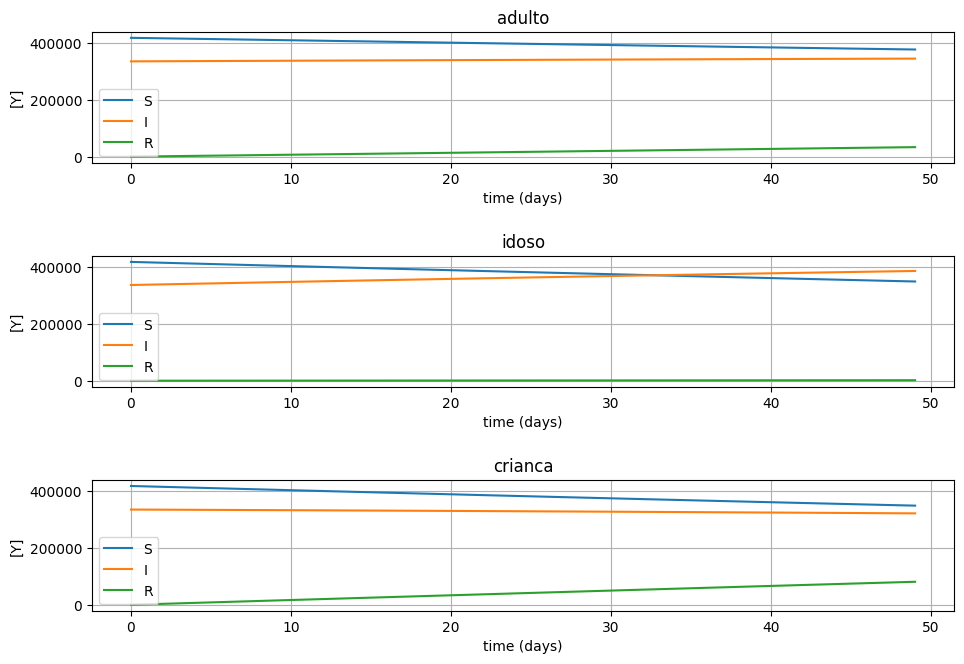

In [5]:
rede = Rede(G,pop_dict)
steps = 10

for i in tqdm(range(steps)):
    rede.run_edo()
    rede.move()

rede.plot_edo()